<img src="./images/qutip-logo.png">

# General notes
- We will be working with frequencies, and **NOT** energies 
- Qutip is a `python` package designed for running quantum simulations - **specifically open quantum systems**
- Comprehensive documentation is available in [this pdf](docs/qutip-doc-4.5.pdf) or [on this website](http://qutip.org/docs/4.1/guide/guide-bloch.html)
- Example simulations are [in this folder](docs/example_animations) - open them on your computer

<img src="./images/available_functions.png"/>

In [1]:
# %matplotlib ipympl
%matplotlib inline

import os
from typing import List, Dict, Tuple, Optional
from collections import defaultdict

import numpy as np
import qutip

# Plotting an colouring
from pyprind import ProgBar
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from collections import OrderedDict

## Note on Python
`python` uses libraries. They will need to be imported first and the functions of that library are accessed via dots `.`
```python
import scipy
scipy.basis(2,1)
```

Importat libraries for us are
<table class="table table-striped table-bordered table-hover table-condensed">


<colgroup>
<col  class="left">

<col  class="left">
</colgroup>
<thead>
<tr>
<th scope="col" class="text-left"><b>Library</b></th>
<th scope="col" class="text-left">Used for</th>
</tr>
</thead>
<tbody>
<tr>
<td class="text-left"><code>numpy</code></td>
<td class="text-left">Making arrays and matrices</td>
</tr>

<tr>
<td class="text-left"><code>matplotlib</code></td>
<td class="text-left">Plotting graphs</td>
</tr>

<tr>
<td class="text-left"><code>qutip</code></td>
<td class="text-left">Running quantum simulations</td>
</tr>
</tbody>
</table> 

# Making quantum objects - OPTIONAL
<img src="./images/qobj.png" alt="drawing" width="400"/>

## Manual definition

In [3]:
qubit_object = qutip.Qobj([[5, 2 , 1], [2, 4, 2], [1, 2, 5]])
qubit_object

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[5. 2. 1.]
 [2. 4. 2.]
 [1. 2. 5.]]

## Supporting functions definitions
> 361 functions available

<table border="4" cellspacing="50" cellpadding="60" rules="groups" frame="hsides">
<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left"><b>Building object</b></th>
<th scope="col" class="org-left">&#xa0;</th>
</tr>
</thead>
<tbody>
<tr>
<td class="org-left"><code>basis(N, e)</code></td>
<td class="org-left">create <b>Ket</b> with <code>N</code> levels, with excited state at <code>e</code></td>
</tr>

<tr>
<td class="org-left"><code>ket2dm(ket)</code></td>
<td class="org-left">takes a <b>Ket</b> and constructs a density matrix</td>
</tr>

<tr>
<td class="org-left"><code>charge(N, M)</code></td>
<td class="org-left">make diagonal matrix from M..0..N</td>
</tr>

<tr>
<td class="org-left"><code>sigmax/y/z()</code></td>
<td class="org-left">sigma operators</td>
</tr>

<tr>
<td class="org-left"><code>qeye(N)</code></td>
<td class="org-left">identity matrix</td>
</tr>

<tr>
<td class="org-left"><code>num(N)</code></td>
<td class="org-left">number operator (same as charge)</td>
</tr>

<tr>
<td class="org-left"><code>destroy(N)</code></td>
<td class="org-left">anhialation operator for an <code>N</code>-dimensional matrix</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><b>Operating on objects</b></td>
<td class="org-left">&#xa0;</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><code>.eigenstates()</code></td>
<td class="org-left">to access, do [1][eigenstateNo]</td>
</tr>

<tr>
<td class="org-left"><code>.eigenenergies()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.full()</code></td>
<td class="org-left">full matrix representation</td>
</tr>

<tr>
<td class="org-left"><code>.conj()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.groundstate()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.matrix_element(ket,bra)</code></td>
<td class="org-left">make sandwhich of operators</td>
</tr>

<tr>
<td class="org-left"><code>.norm()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.unit()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.transpose()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.expm()</code></td>
<td class="org-left">exponential of the matrix</td>
</tr>

<tr>
<td class="org-left"><code>.dag()</code></td>
<td class="org-left">return adjoint</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><b>Higher level functions</b></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>expect(operator, state)</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>tensor(component1, c2, ..)</code></td>
<td class="org-left">&#xa0;</td>
</tr>
</tbody>
</table>

In [100]:
# Basic ket
qutip.basis(3,2)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]]

In [101]:
# Creation of diagonal matrix
qutip.charge(3,-2)

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[-2.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  3.]]

In [102]:
# Evaluation of eigenenergies
val = qubit_object.eigenstates()

for idx, (energy, state) in enumerate(zip(val[0], val[1])):
#     print(f"----------🐳State {idx}🐳----------")
    print(f"Energy: {energy}")
    print(f"State: {state}")

Energy: 2.0
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.40824829]
 [-0.81649658]
 [ 0.40824829]]
Energy: 4.000000000000002
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.70710678]]
Energy: 8.0
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]


### Raising + lowering operators
- $a^{\dagger}a^{\dagger}\left|0\right\rangle = \sqrt{0+1}\sqrt{1+1}\left|2\right\rangle$
- $a * a^{\dagger}\left|0\right\rangle = \left|0\right\rangle$


In [103]:
# Diagonal matrix for anhialation operator
vac = qutip.basis(5, 0)
display(vac)

a = qutip.destroy(5)
display(a)

display(a.dag() * a.dag() * vac)
display(a * a.dag() * vac)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]]

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

### Density matrices
1. Can be constructed by building $\left|2\right\rangle$ and then taking the product
\begin{equation}
\left|2\right\rangle \times \left\langle 2\right|
\end{equation}

2. Or using the pre-build `fock()` operator

In [104]:
c = qutip.basis(5, 2)
display(c * c.dag())

qutip.fock_dm(5,2)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

# Bloch Sphere supporting functions - MUST RUN
<img src="./images/simulation-flow.svg">

---

<center><b>Utilised functions</b></center>
<table style="border:1px solid black;margin-left:auto;margin-right:auto;" cellspacing="0" cellpadding="60" rules="groups" frame="hsides">

<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<tbody>
<tr>
<td class="org-left"><code>b = Bloch()</code></td>
<td class="org-left">Sphere on which to plot</td>
</tr>

<tr>
<td class="org-left"><code>b.add_points([[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]])</code></td>
<td class="org-left">Add points</td>
</tr>

<tr>
<td class="org-left"><code>b.add_vectors([[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]])</code></td>
<td class="org-left">Add vectors</td>
</tr>

<tr>
<td class="org-left"><code>b.add_states([state1, state2, state3])</code></td>
<td class="org-left">Add states</td>
</tr>
</tbody>
</table>
</table>


## Supporting plotting functions
- Generate colours
- Saving
- Combining images to single video

In [4]:
%matplotlib inline

CMAPS = OrderedDict()
CMAPS["sequential"] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis',
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
]
CMAPS['cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

ANIMATION_FOLDER = "./animations"

def generate_colormap_for_a_list(list_to_generate: List[float], colormap: str) -> "Colormap":
    """
    Create a list of colours for each point in the supplied list
    """
    assert colormap in CMAPS["sequential"] + CMAPS["cyclic"]
    normaliser = mpl.colors.Normalize(min(list_to_generate), max(list_to_generate))
    
    return plt.get_cmap(colormap)(normaliser(list_to_generate))
    
def prepare_folder(simulation_name: str):
    """
    Prepares folder to save the animations
    """
    folder_name = f"./{ANIMATION_FOLDER}/{simulation_name}"
    
    os.system(f"rm -rf {folder_name}");
    os.system(f"mkdir -p {folder_name}");
    
def save_with_idx(fig, idx, simulation_name: str):
    """Save plot with an index - indexes are collected to make full animation. 
    Names are 001, 002, 003, etc
    """
    save_path = f"./{ANIMATION_FOLDER}/{simulation_name}/{idx:03d}.png"
    fig.savefig(save_path, bbox_inches = 'tight', dpi=80);
    
def build_animation(simulation_name: str):
    """
    Makes and animation from the images made with simulation
    """
    print("Building gif and mp4")
    animation_file_name = f"{ANIMATION_FOLDER}/{simulation_name}"
    # -r rate of 10
    # -i input files
    # %03d.png selects all images with names such as 001.png, 002.png
    os.system(f"ffmpeg -y -r 10 -i {ANIMATION_FOLDER}/{simulation_name}/%03d.png {animation_file_name}.mp4") 
    os.system(f"convert -delay 10 -loop 0 {ANIMATION_FOLDER}/{simulation_name}/*.png {animation_file_name}.gif") 

## Plotting functions
- Create plot
- Plot points and vectors

In [5]:
from qutip. bloch import Bloch
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.axes import Axes

def format_bloch_sphere(blch: Bloch):
    """
    Format Bloch sphere for before plotting begins
    """
    blch.point_size = [50]    
    blch.font_size = 30
    
    blch.vector_color = ['r']
    blch.sphere_color = "#ffe7ba"
    blch.frame_color = "#8b7355"
    
    blch.xlabel = [r"$\left\langle\sigma_x\right\rangle$", ""]
    blch.ylabel = [r"$\left\langle\sigma_y\right\rangle$", ""]
    blch.zlabel = [r"$\left\langle\sigma_z\right\rangle$", ""]

#     blch.make_sphere()

def prepare_figure_and_folder_for_simulation(simulation_name: str, xlim=[0,1]) -> Tuple[Figure, "Axis", Bloch]:
    """
    Create a bloch sphere and 2 axes to plot the sigmax and sigmaz evolution on
    xlim sets the limit on the expectation axes
    """
    fig = plt.figure(figsize=(20,8))
    axes = {}
    gs = GridSpec(4, 10, figure=fig, wspace=1, hspace=1)
    
    # Add Bloch sphere - it needs scaling
    axes["bloch-sphere"] = fig.add_subplot(gs[0:4, 0:4], projection='3d') # left side square
    axes["bloch-sphere"].get_proj = lambda: np.dot(Axes3D.get_proj(axes["bloch-sphere"]), np.diag([0.9, 0.9, 1.2, 1]))
    blch = Bloch(axes=axes["bloch-sphere"])
    format_bloch_sphere(blch)
    
    # Add axes for expectation value
    axes["sigma-z"] = fig.add_subplot(gs[0:2, 4:])    # top rectange
    axes["sigma-x"] = fig.add_subplot(gs[2:4, 4:], sharex=axes["sigma-z"])    # bottom rectangle
    for name in ["sigma-z", "sigma-x"]:
        axes[name].tick_params(axis='both', which='major', labelsize=20)
        axes[name].set_yticks([-1, -0.5, 0, 0.5, 1])
        axes[name].set_yticklabels(["-1", "-0.5", "0", "0.5", "1"]) 
        axes[name].set_ylim([-1,1])
        axes[name].grid(True, which='both')
        
    axes["sigma-z"].set_title("$\sigma_z$", size = 40, pad = 20, color = 'red')
    axes["sigma-x"].set_title("$\sigma_x$", size = 40, pad = 20, color = 'blue')
    axes["sigma-x"].set_xlabel('time (arb)', size = 20)
    axes["sigma-x"].set_xticklabels([])
    axes["sigma-x"].set_xlim(xlim)

    prepare_folder(simulation_name)
    
    return (fig, axes, blch)

def plot_points_and_update_vector_on_bloch_sphere(
    blch: Bloch,
    x_point_list: List[float], y_point_list: List[float], z_point_list: List[float]
):
    """Plot [x0, x1, x2, ..., xn], [y0, y1, y2, ..., yn] and [z0, z1, z2, ..., zn] as point
       Plot [xn, yn, zn] as a vector
    """
    blch.clear();
    blch.add_vectors([x_point_list[-1], y_point_list[-1], z_point_list[-1]])
    blch.add_points([x_point_list, y_point_list, z_point_list], 'm')
    blch.make_sphere()

# Simulation Example - MUST RUN

## Building states through combinations of kets
**Remember that in `qutip`: $\begin{pmatrix}1\\0\end{pmatrix}$ is the excited state, $\begin{pmatrix}0\\1\end{pmatrix}$ is the ground state and a superposition can be made by combining and normalising:**
\begin{equation}
\frac{\left|0\right\rangle + \left|1\right\rangle}{2} = \text{Normalized}
\big( \left|0\right\rangle + \left|1\right\rangle \big)
\end{equation}

In [6]:
state_dictionary = {}
state_dictionary["|1>"] = qutip.basis(2,0)
state_dictionary["|0>"] = qutip.basis(2,1)
state_dictionary["|0>+|1>"] = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
state_dictionary["|0>-|1>"] = (qutip.basis(2,0) - qutip.basis(2,1)).unit()
state_dictionary["|0>+i|1>"] = (qutip.basis(2,0) + 1j * qutip.basis(2,1)).unit()
state_dictionary["|0>-i|1>"] = (qutip.basis(2,0) - 1j * qutip.basis(2,1)).unit()

## Defining expectation values
\begin{equation}
  \left\langle\sigma_i\right\rangle = \left\langle \Psi \right| \hat{\sigma}_i\left|\Psi\right\rangle
\end{equation}

In [7]:
from qutip import Qobj

def expx(state: Qobj) -> float:
    return qutip.expect(qutip.sigmax(), state)
def expy(state: Qobj) -> float:
    return qutip.expect(qutip.sigmay(), state)
def expz(state: Qobj) -> float:
    return qutip.expect(qutip.sigmaz(), state)

## Define a simple Hamiltonian for a two level system, undergoing unitary evolution
1. Hamiltonian of the system
\begin{equation}
  \mathcal{H} = \frac{\omega}{2} \sigma_z = \frac{\omega}{2} \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}.
\end{equation}

2. Is subject to unitary evolution:
\begin{equation}
 \begin{aligned}
  U(t) = e^{-i\mathcal{H}t} & = e^{-i\frac{\omega t}{2}\sigma_z}\\
  & = \begin{pmatrix} e^{\omega t/2} & 0 \\ 0 & e^{-\omega t/2} \end{pmatrix}
  \end{aligned}
\end{equation}

<details>
<summary>Simple proof</summary>
\begin{equation}\label{uniRotation}
 \begin{aligned}
 U &= \exp\bigg[i\alpha\sigma_j\bigg] = \sum_{k}\frac{(i\alpha)^k}{k!}\sigma_j^k \\&= \sum_{k=0}\frac{{\alpha^{2k}(-1)^k}}{2k}\mathbb{I}+i\sum_{k=0}\frac{{\alpha^{2k+1}(-1)^k}}{2k+1}\sigma_j\\
 &= \cos(\alpha)\mathbb{I}+i\sin(\alpha)\sigma_j,
 \end{aligned}
\end{equation}
</details>

3. After which the expectation value can be found
\begin{equation}
     \left\langle\sigma_z\right\rangle = \left\langle \Psi(0)\,U^{\dagger}\,\right| \hat{\sigma}_z \left|\,U^{\dagger}\,\Psi(0)\right\rangle
\end{equation}


We will store the coordinates in a dictionary called `point_list`:

```python
point_list = {
    "x": [x1, x2, x3, ..., xn],
    "y": [y1, y2, y3, ..., yn],
    "z": [z1, z2, z3, ..., zn],
}
```

1
2
3


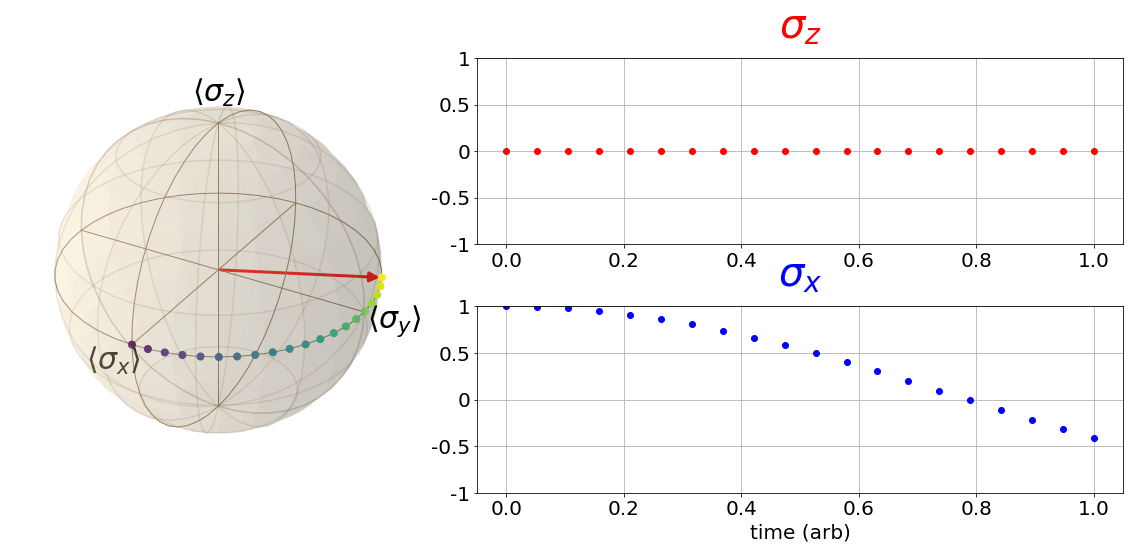

<Figure size 360x360 with 0 Axes>

In [56]:
SIMULATION_NAME = "test-simulation"
NO_POINTS = 20
omega = 2
H = float(omega) / 2 * qutip.sigmaz()

time_list = np.linspace(0, 1, NO_POINTS)
point_list = defaultdict(list)

fig, ax, blch = prepare_figure_and_folder_for_simulation(SIMULATION_NAME)
blch.point_color = generate_colormap_for_a_list(time_list, "viridis")

for time_idx, time in enumerate(time_list):
    U = (-1.j * H * time).expm();
    evolved_state = U * state_dictionary["|0>+|1>"]

    point_list["x"].append(np.real(expx(evolved_state)))
    point_list["y"].append(np.real(expy(evolved_state)))
    point_list["z"].append(np.real(expz(evolved_state)))  
    
    # Plot Bloch sphere
    plot_points_and_update_vector_on_bloch_sphere(blch, point_list["x"], point_list["y"], point_list["z"])    
    # Plot expectation values
    ax["sigma-z"].plot(time, point_list["z"][-1], 'o', c = 'red');
    ax["sigma-x"].plot(time, point_list["x"][-1], 'o', c = 'blue');
    
    # Save each image
    save_with_idx(fig, time_idx, simulation_name=SIMULATION_NAME)
build_animation(SIMULATION_NAME)   

# Bulk simulations with no dissapation
We wrap the above cell in a functio and also add opptions to:
- Apply a unitary transformation that would put us in the rotating wave frame
\begin{equation}
\left|\Psi\right\rangle_{rwa} = U^{\dagger}_{rwa}\left|\Psi(0)\right\rangle
\end{equation}

```python
U0_dag = unitary_func(time).dag();
evolved_state = U0_dag * evolved_state;
```

In [8]:
def evaluate_standard(H: Qobj, initial_state: Qobj, simulation_name: str, unitary_func: Qobj, 
                      number_of_points: int, time_period: float,
                      colormap: str="viridis"
                     ):
    """
    Evaluate the evolution under H of the initial state stt 

    H:                 Hamiltonian of the system
    initial_state:     The initial state of the system
    simulation_name:   Simulation will be created with this name
    unitary_func:      A unitary transformation that can, for example, quit out of a rotating wave frame
    number_of_points:  Number of frames to make
    time_period:       List of time points to make simulation for
    colormap:          Colormap to use for the animation. viridis is the default
    """
    
    time_list = np.linspace(0, time_period, number_of_points)
    point_list = defaultdict(list)

    fig, ax, blch = prepare_figure_and_folder_for_simulation(simulation_name, 
                                                             xlim=[min(time_list), max(time_list)])
    blch.point_color = generate_colormap_for_a_list(time_list, colormap)

    progress_bar = ProgBar(number_of_points, bar_char="█")
    for time_idx, time in enumerate(time_list):
        U = (-1.j * H * time).expm();
        evolved_state = U * initial_state
        
        if unitary_func is not None:
            U0_dag = unitary_func(time).dag();
            evolved_state = U0_dag * evolved_state;

        point_list["x"].append(np.real(expx(evolved_state)))
        point_list["y"].append(np.real(expy(evolved_state)))
        point_list["z"].append(np.real(expz(evolved_state)))  

        # Plot Bloch sphere
        plot_points_and_update_vector_on_bloch_sphere(blch, point_list["x"], point_list["y"], point_list["z"])    
        # Plot expectation values
        ax["sigma-z"].plot(time, point_list["z"][-1], 'o', c = 'red');
        ax["sigma-x"].plot(time, point_list["x"][-1], 'o', c = 'blue');

        # Save each image
        save_with_idx(fig, time_idx, simulation_name)
        
        progress_bar.update()
        
        
    build_animation(simulation_name)   

#### Superposition - no dissapation

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:13


Building gif and mp4


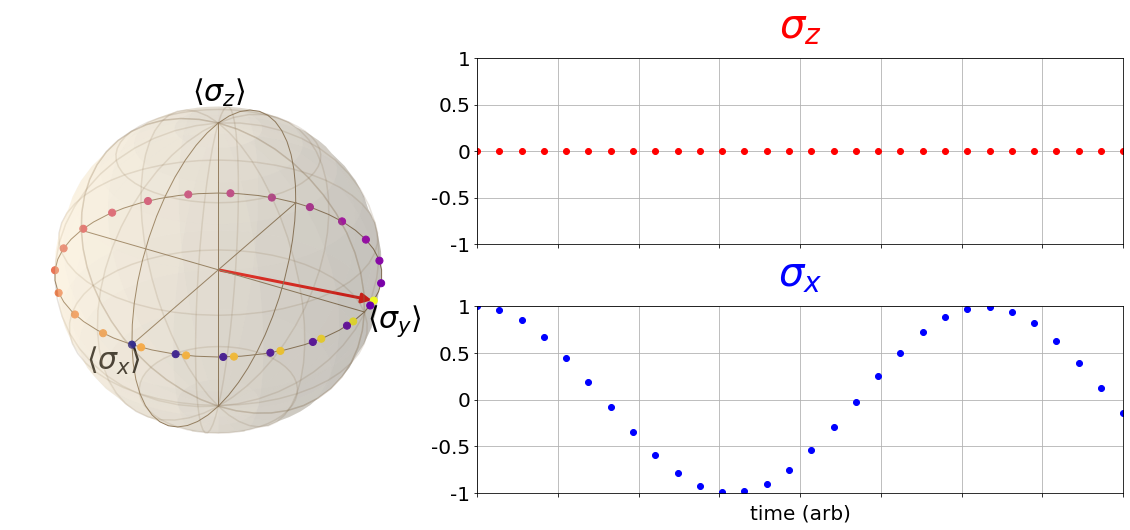

<Figure size 360x360 with 0 Axes>

In [9]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|0>+|1>"]
SIMULATION_NAME="superposition__no-dissapation"
omega = 2
H = float(omega) / 2 * qutip.sigmaz()

evaluate_standard(H, INITIAL_STATE, SIMULATION_NAME, unitary_func=None,
                  number_of_points=NO_POINTS, time_period=4,
                  colormap="plasma"
)

#### Excited state - no dissapation

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10


Building gif and mp4


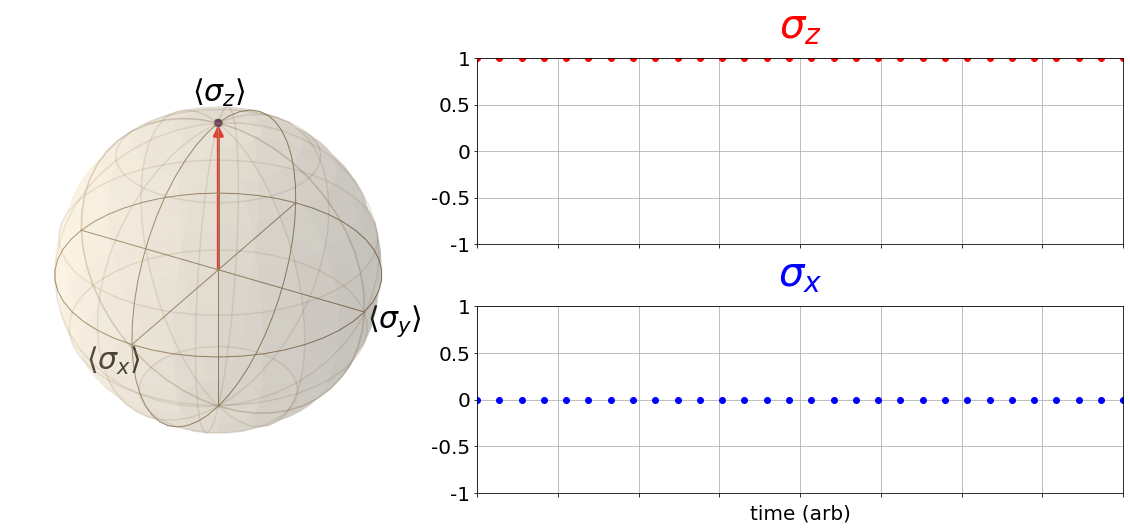

<Figure size 360x360 with 0 Axes>

In [90]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|1>"]
SIMULATION_NAME="excited__no-dissapation"
omega = 2
H = float(omega) / 2 * qutip.sigmaz()

evaluate_standard(H, INITIAL_STATE, SIMULATION_NAME, unitary_func=None,
                  number_of_points=NO_POINTS, time_period=4,
                  colormap="plasma"
)

#### Superposition - with external driving
With driving, the Hamiltonian
  \begin{equation}\label{app2}
  	\mathcal{H} = -\frac{\hbar\omega_0}{2}\sigma_z-\hbar\Omega\cos(\omega_0 t)\sigma_x
  \end{equation}
  
  can be subjected to a rotation
    \begin{equation}\label{app2Try}
  	U(t) = \exp\left[-i\frac{\omega_0 t}{2}\sigma_z\right]
  \end{equation}  
  
  which will give a 
    \begin{equation}\label{app2New}
  	\begin{aligned}
  	\mathcal{H'} & = U\mathcal{H}U^{\dagger} - i\hbar U\dot{U}^{\dagger}\\
  	& = -\frac{\hbar\omega}{2}e^{-i\omega_0t/2\sigma_z}\sigma_ze^{+i\omega_0t/2\sigma_z}-\hbar\Omega\frac{e^{i\omega t}+e^{-i\omega t}}{2}e^{-i\omega_0t/2\sigma_z}\sigma_xe^{i\omega_0t/2\sigma_z}- i\hbar e^{-i\omega_0t/2\sigma_z}\bigg(i\frac{\omega}{2}\sigma_z\bigg)e^{i\omega_0t/2\sigma_z}\\
  	& = -\frac{\hbar\Omega}{2}\bigg(e^{i\omega t}+e^{-i\omega t}\bigg)e^{-i\omega_0t/2\sigma_z}\red{e^{(-1)i\omega_0t/2\sigma_z}\sigma_x}\\
  	& = -\frac{\hbar\Omega}{2}\bigg(e^{i\omega t}+e^{-i\omega t}\bigg){e^{-i\omega_0t\sigma_z}\sigma_x}\\
  	& =-\frac{\hbar\Omega}{2}\bigg(e^{i\omega t}+e^{-i\omega t}\bigg)\begin{pmatrix}
  	e^{-i\omega_0t}&0\\0&e^{+i\omega_0t}
  	\end{pmatrix}\begin{pmatrix}
  	0&1\\1&0
  	\end{pmatrix}\\
  	& =-\frac{\hbar\Omega}{2}\bigg(e^{i\omega t}+e^{-i\omega t}\bigg)\begin{pmatrix}
  	0&e^{i\omega_0t}\\e^{-i\omega_0t}&0
  	\end{pmatrix}
  	\\
  	& =-\frac{\hbar\Omega}{2}\begin{pmatrix}
  	0&1+e^{2i\omega_0t}\\1+e^{-2i\omega_0t}&0
  	\end{pmatrix}
  	\\
  	& \approx -\frac{\hbar\Omega}{2}\begin{pmatrix}
  	0&1\\1&0
  	\end{pmatrix}
  	\\
  	& \approx -\frac{\hbar\Omega}{2}\sigma_x
  	\end{aligned}
  \end{equation}
  
  

##### In the rotated frame

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10


Building gif and mp4


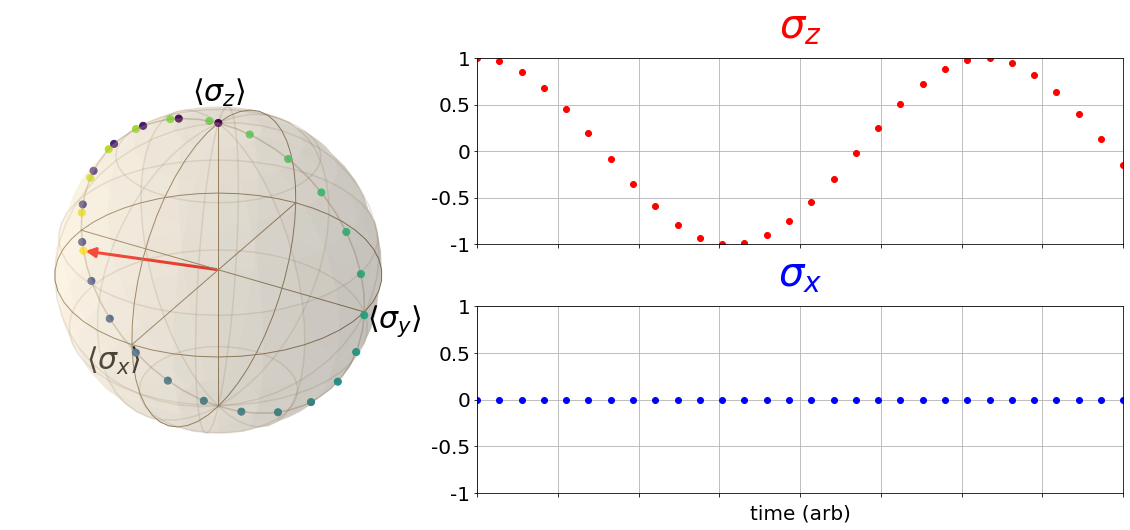

<Figure size 360x360 with 0 Axes>

In [92]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|1>"]
SIMULATION_NAME="excited__with-drive__no-dissapation"
omega = 2
H = float(omega) / 2 * qutip.sigmax()

evaluate_standard(H, INITIAL_STATE, SIMULATION_NAME, unitary_func=None,
                  number_of_points=NO_POINTS, time_period=4,
                  colormap="plasma"
)

##### In the original frame (will be very fast)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10


Building gif and mp4


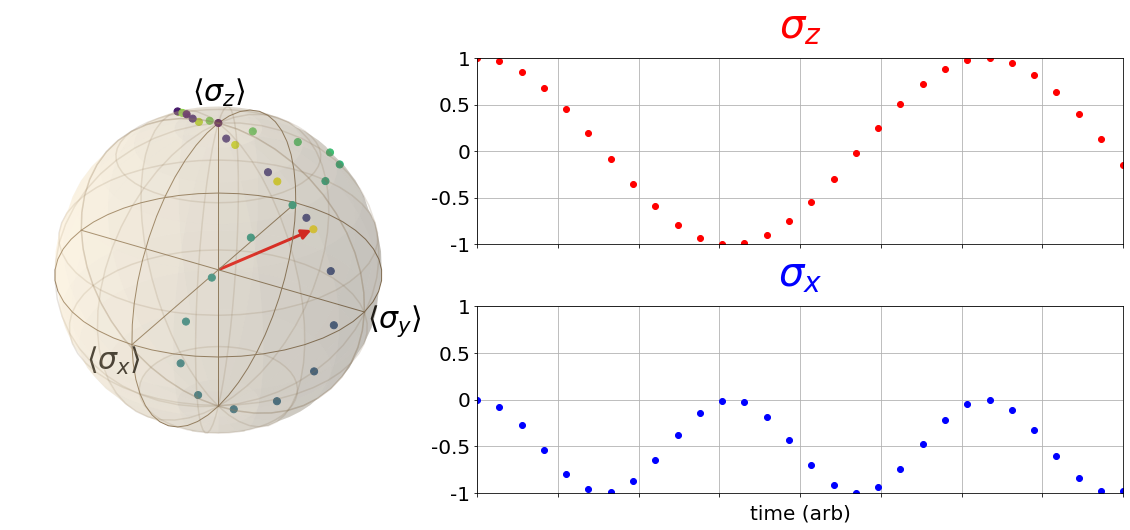

<Figure size 360x360 with 0 Axes>

In [94]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|1>"]
SIMULATION_NAME="excited_drive_not_in_rotated_frame_no-dissapation"
omega = 2
H = float(omega) / 2 * qutip.sigmax()
def UNITARY_FUNC(t):
    #This unitary transformation put us into the rotating frame , in which |0> and |1> are at the same energies
    return (-1.0j * 2 / 2 * t * qutip.sigmaz()).expm();

evaluate_standard(H, INITIAL_STATE, SIMULATION_NAME, unitary_func=UNITARY_FUNC,
                  number_of_points=NO_POINTS, time_period=4,
                  colormap="plasma"
)

# Simulation with dissapation
We are used to the Master equation of the form with the following Linbland operator
 \begin{equation}
 \dot{\rho} = \frac{-i}{\hbar}\bigg[\mathcal{H},\rho\bigg] + \mathcal{L};\quad\quad\mathcal{L} = \begin{pmatrix}
 {\rho_{11}\Gamma_1 }& {-(\Gamma_\phi + \frac{\Gamma_1}{2})\rho_{01}}\\{-(\Gamma_\phi + \frac{\Gamma_1}{2})\rho_{01}}&{-\Gamma_1\rho_{11}}
 \end{pmatrix}, 
 \end{equation}
 
 **However qutip workds with the following definition** [see here](http://qutip.org/docs/4.1/guide/dynamics/dynamics-master.html)
  \begin{equation}
 \dot\rho=-\frac{i}{\hbar}\bigg[H,\rho\bigg]+\sum_n \frac{1}{2} \left[2 C_n \rho(t) C_n^{+} - \rho(t) C_n^{+} C_n - C_n^{+} C_n \rho(t)\right]
 \end{equation}
 
**Which will required the following matrices:**

\begin{equation}
\text{JUMP_OPERATOR_GAMMA1} =  \begin{pmatrix}
  0 & 0 \\ \sqrt{\Gamma_1} & 0
 \end{pmatrix} = \sqrt{\Gamma_1}\sigma_-
 \end{equation}
 
 \begin{equation}
 \text{JUMP_OPERATOR_GAMMA_PHI} =  \begin{pmatrix}
  \sqrt{\Gamma_\phi/2} & 0 \\ 0 & -\sqrt{\Gamma_\phi/2}
 \end{pmatrix} = \sqrt{\Gamma_\phi/2}\sigma_z
 \end{equation}

These should be passed into the function `mesolve` (master-equation-solver)
```python
mesolve(H, initial_state, time_list, 
        [JUMP_OPERATOR_GAMMA1, JUMP_OPERATOR_GAMMA_PHI], 
        [sigmax(), sigmay(), sigmaz()]);
```
along with a list of expectation values to find `[sigmax(), sigmay(), sigmaz()]`

In [105]:
def evaluate_master_equation(
    H: Qobj, initial_state: Qobj, simulation_name: str, dissapation_list: List[Qobj], 
    number_of_points: int, time_period: float,
    colormap: str="viridis"
):
    """
    Evaluate the evolution under H of the initial state stt 

    H:                 Hamiltonian of the system
    initial_state:     The initial state of the system
    simulation_name:   Simulation will be created with this name
    dissapation_list:  List with the jump operators that are responsible for dissapation
    number_of_points:  Number of frames to make
    time_period:       List of time points to make simulation for
    colormap:          Colormap to use for the animation. viridis is the default
    """
    
    time_list = np.linspace(0, time_period, number_of_points)
    point_list = defaultdict(list)

    fig, ax, blch = prepare_figure_and_folder_for_simulation(simulation_name, 
                                                             xlim=[min(time_list), max(time_list)])
    blch.point_color = generate_colormap_for_a_list(time_list, colormap)

    simulation_result = qutip.mesolve(
        H, initial_state, time_list, 
        dissapation_list, 
        [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()])
    
    for time_idx, time in enumerate(time_list):
        point_list["x"].append(simulation_result.expect[0][time_idx])
        point_list["y"].append(simulation_result.expect[1][time_idx])
        point_list["z"].append(simulation_result.expect[2][time_idx])

        # Plot Bloch sphere
        plot_points_and_update_vector_on_bloch_sphere(blch, point_list["x"], point_list["y"], point_list["z"])    
        # Plot expectation values
        ax["sigma-z"].plot(time, point_list["z"][-1], 'o', c = 'red');
        ax["sigma-x"].plot(time, point_list["x"][-1], 'o', c = 'blue');

        # Save each image
        save_with_idx(fig, time_idx, simulation_name)        
        
    build_animation(simulation_name)   

#### Excited state, with dissapation but no drive


Building gif and mp4


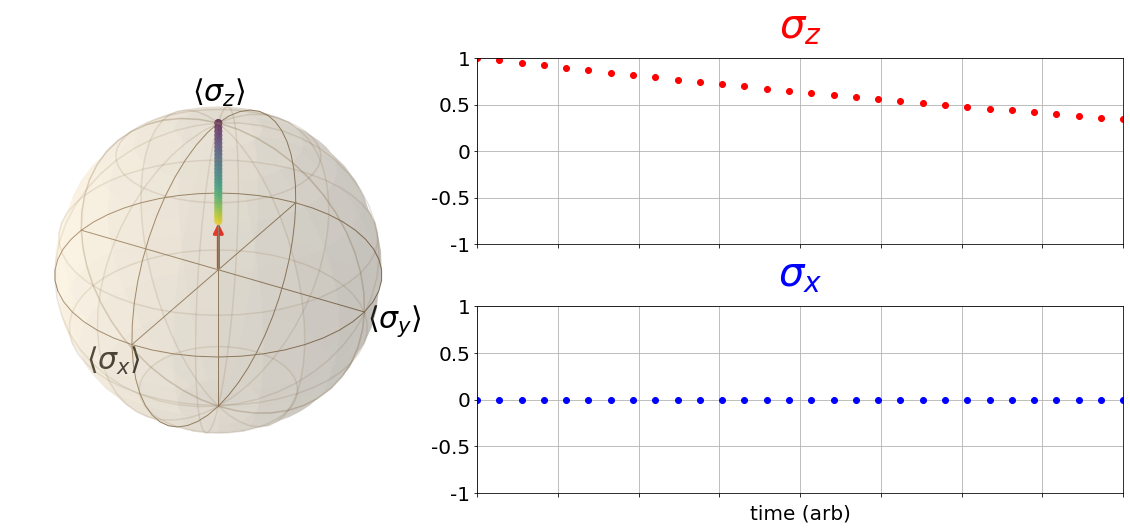

<Figure size 360x360 with 0 Axes>

In [102]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|1>"]
SIMULATION_NAME="superposition__dissapation__no-drive"

omega = 2
GAMMA_1 = 0.1
GAMMA_PHI = 2

H = float(omega) / 2 * qutip.sigmaz()
JUMP_OPERATOR_GAMMA_1 = np.sqrt(GAMMA_1) * qutip.sigmam()
JUMP_OPERATOR_GAMMA_PHI = np.sqrt(GAMMA_PHI/2) * qutip.sigmaz()


evaluate_master_equation(
    H, INITIAL_STATE, SIMULATION_NAME, dissapation_list=[JUMP_OPERATOR_GAMMA_1, JUMP_OPERATOR_GAMMA_PHI],
    number_of_points=NO_POINTS, time_period=4,
    colormap="magma"
)

#### Excited state, with dissapation and drive

Building gif and mp4


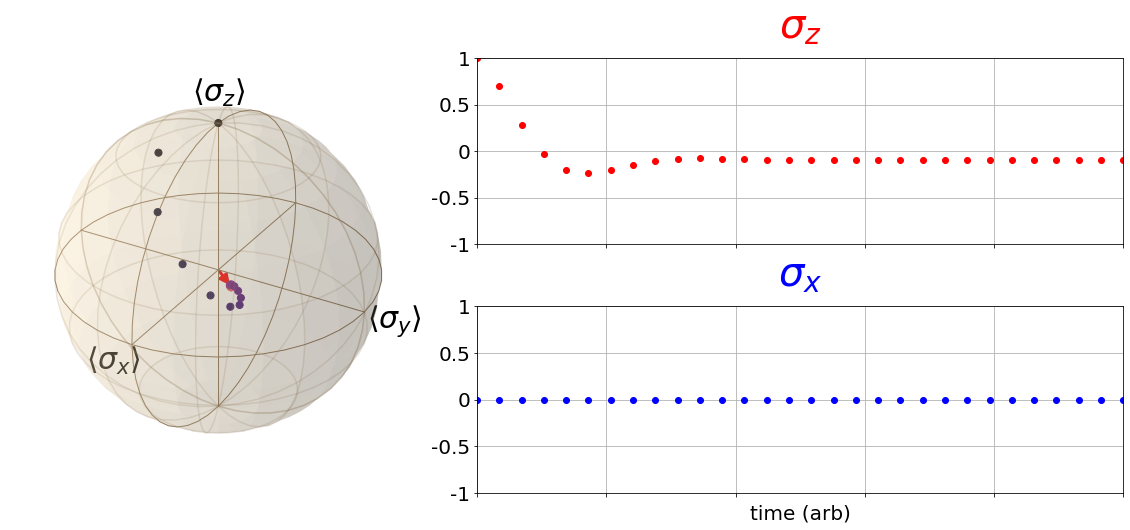

<Figure size 360x360 with 0 Axes>

In [106]:
NO_POINTS = 30
INITIAL_STATE = state_dictionary["|1>"]
SIMULATION_NAME="superposition__dissapation__with-drive"

omega = 2
GAMMA_1 = 0.2
GAMMA_PHI = 2

H = float(omega) / 2 * qutip.sigmax()
JUMP_OPERATOR_GAMMA_1 = np.sqrt(GAMMA_1) * qutip.sigmam()
JUMP_OPERATOR_GAMMA_PHI = np.sqrt(GAMMA_PHI/2) * qutip.sigmaz()


evaluate_master_equation(
    H, INITIAL_STATE, SIMULATION_NAME, dissapation_list=[JUMP_OPERATOR_GAMMA_1, JUMP_OPERATOR_GAMMA_PHI],
    number_of_points=NO_POINTS, time_period=10,
    colormap="magma"
)

#### Combinration of runs

Building gif and mp4


0% [█     ] 100% | ETA: 00:01:20

Building gif and mp4
Building gif and mp4


0% [███   ] 100% | ETA: 00:00:49

Building gif and mp4


0% [████  ] 100% | ETA: 00:00:33

Building gif and mp4
Building gif and mp4


0% [██████] 100% | ETA: 00:00:00
Total time elapsed: 00:01:39


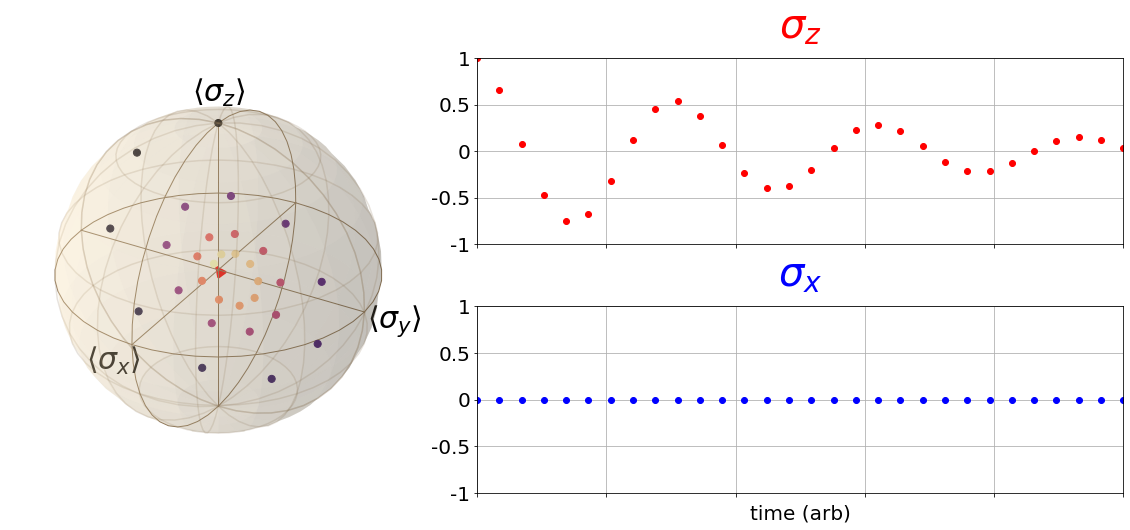

<Figure size 360x360 with 0 Axes>

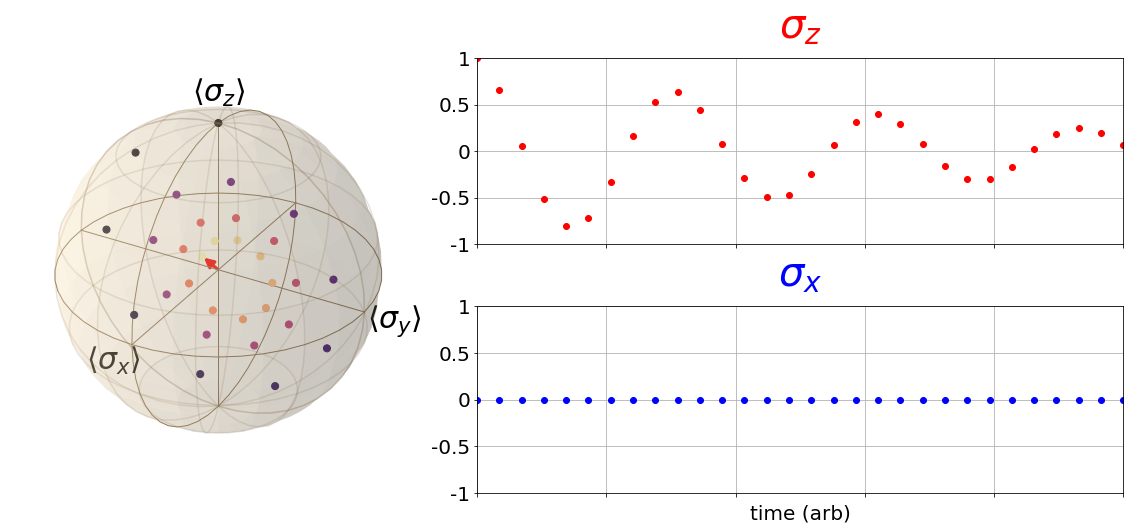

<Figure size 360x360 with 0 Axes>

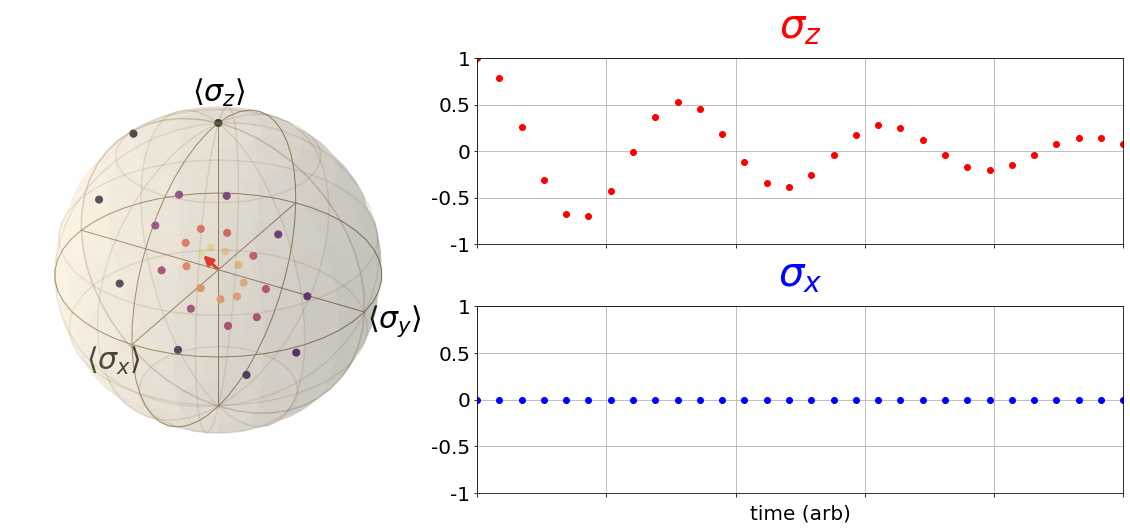

<Figure size 360x360 with 0 Axes>

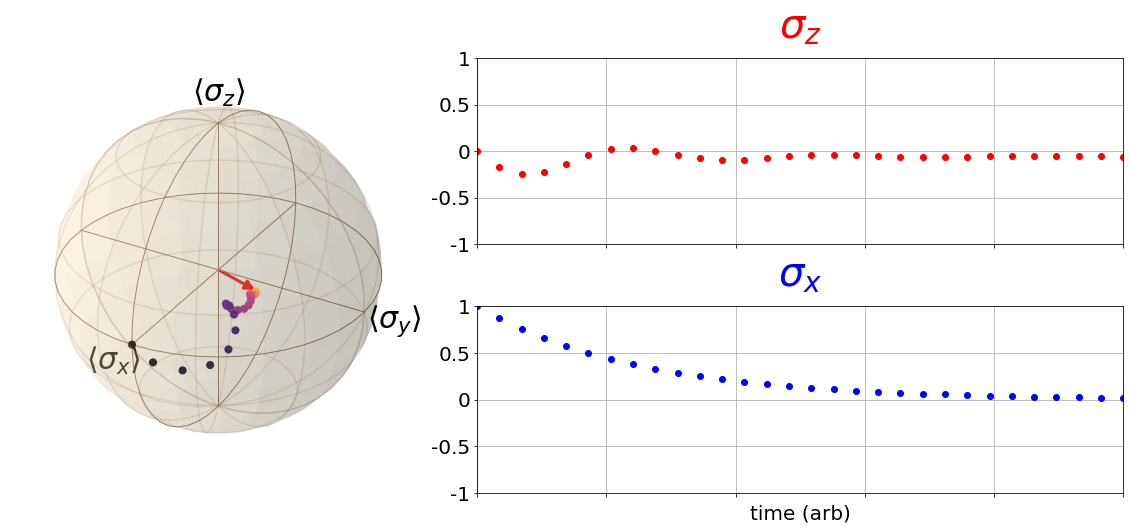

<Figure size 360x360 with 0 Axes>

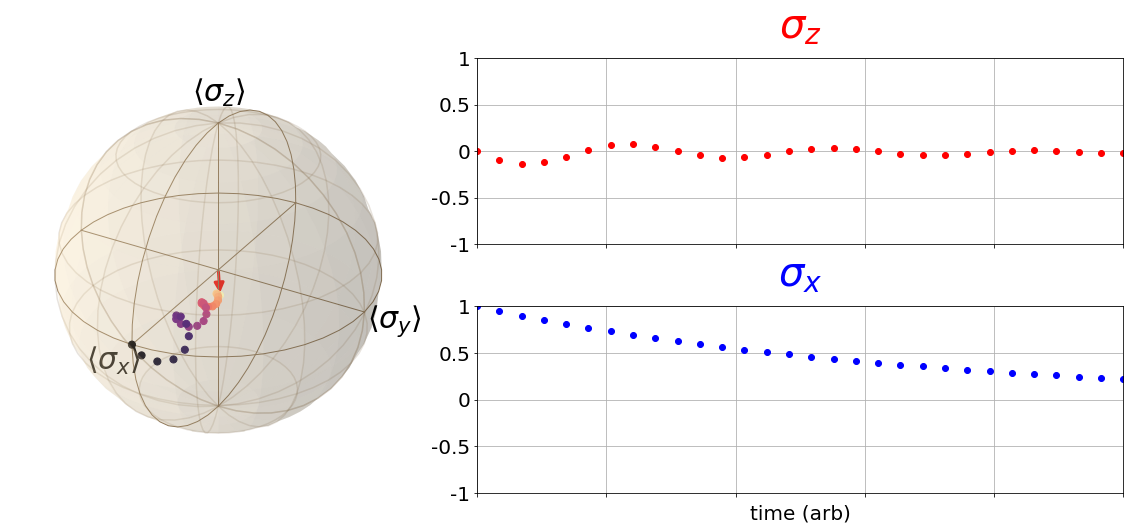

<Figure size 360x360 with 0 Axes>

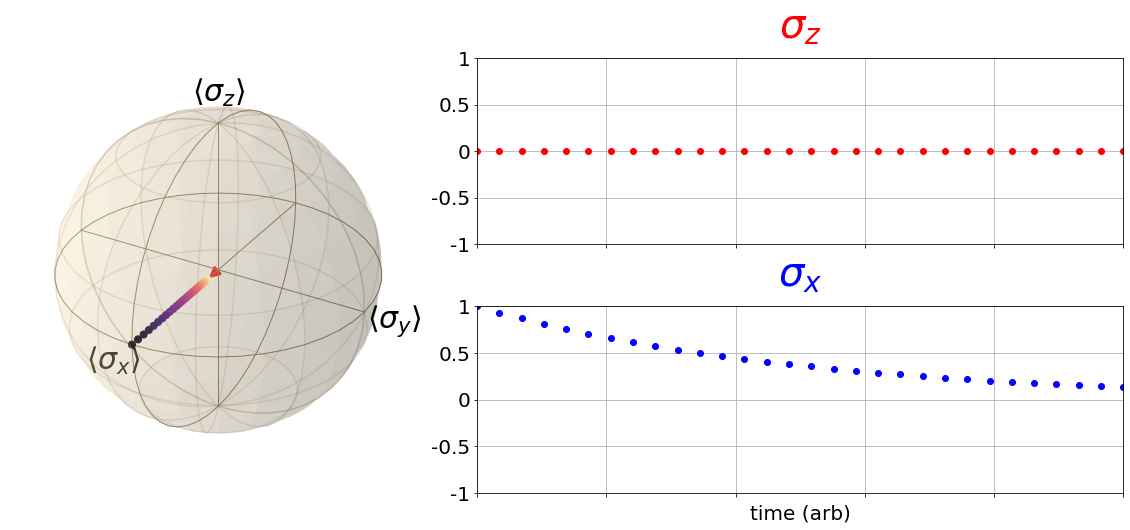

<Figure size 360x360 with 0 Axes>

In [109]:
NO_POINTS = 30
omega = 2
phi = 0  # rotation in the x-y plane

H = float(omega) / 2 * (np.sin(phi) * qutip.sigmay() + np.cos(phi) * qutip.sigmax())

run_list = [];
run_list.append(["excited__drive__with-relaxation-and-dephasing", state_dictionary["|1>"], 0.2, 0.1]);
run_list.append(["excited__drive__with-relaxation", state_dictionary["|1>"], 0.2, 0]);
run_list.append(["excited__drive__with-dephasing", state_dictionary["|1>"], 0, 0.4]);
run_list.append(["superposition__drive_with-relaxation-and-dephasing", state_dictionary["|0>+|1>"], 0.6, 0.1]);
run_list.append(["superposition__drive_with-relaxation", state_dictionary["|0>+|1>"], 0.3, 0]);
run_list.append(["superposition__drive_with-dephasing", state_dictionary["|0>+|1>"], 0, 0.2]);

#repeat for all runs
progress_bar = ProgBar(len(run_list), bar_char="█")
for run_idx, run in enumerate(run_list):
    SIMULATION_NAME = run[0];
    INITIAL_STATE = run[1];
    GAMMA_1 = run[2];
    GAMMA_PHI = run[3];

    dissapation_list = [np.sqrt(GAMMA_1) * qutip.sigmam(), np.sqrt(GAMMA_PHI/2) * qutip.sigmaz()];
    
    evaluate_master_equation(
        H, INITIAL_STATE, SIMULATION_NAME, dissapation_list,
        number_of_points=NO_POINTS, time_period=10,
        colormap="magma"
    )
    progress_bar.update()

# Extensions
- Time-dependent Hamiltonians
- More compex systems can be solved using the **Linbland solver**
- Monte Carlo Solver
- Stochastic Solver
- Steady state solitions
- Running simulations in parallel
- Even more visualisation

In all cases, the best resource is the official documentation in [this pdf](qutip-doc-4.5.pdf). 

> **160/390 pages are examples**. The rest is a reference on how to use the different functions


## Correlation functions
<img src="./images/correlation.png"/>

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7.]]

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.00184254 0.00494126 0.00756401 0.01400893 0.01098394 0.02368518
  0.00724179 0.02876092]
 [0.00494126 0.01325129 0.02028487 0.03756862 0.02945631 0.06351799
  0.01942076 0.07712994]
 [0.00756401 0.02028487 0.03105175 0.05750945 0.04509124 0.09723233
  0.02972899 0.11806928]
 [0.01400893 0.03756862 0.05750945 0.10651047 0.08351131 0.18007929
  0.05505962 0.21867041]
 [0.01098394 0.02945631 0.04509124 0.08351131 0.06547844 0.14119417
  0.04317042 0.17145218]
 [0.02368518 0.06351799 0.09723233 0.18007929 0.14119417 0.30446352
  0.09309036 0.36971026]
 [0.00724179 0.01942076 0.02972899 0.05505962 0.04317042 0.09309036
  0.02846258 0.11303969]
 [0.02876092 0.07712994 0.11806928 0.21867041 0.17145218 0.36971026
  0.11303969 0.44893941]]

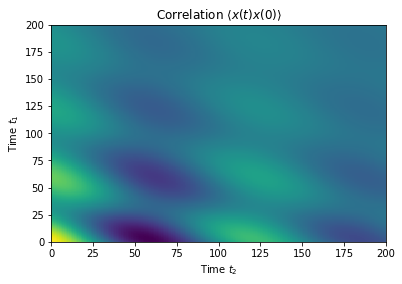

In [113]:
times = np.linspace(0, 10.0, 200)

a = qutip.destroy(8)
x = a.dag() + a
H = a.dag() * a
display(H)

ALPHA = 2.5
rho0 = qutip.coherent_dm(8, ALPHA)
display(rho0)

corr = qutip.correlation_2op_2t(H, rho0, 
                          times, times, 
                          [np.sqrt(0.25) * a], 
                          x, x)

plt.pcolor(np.real(corr))
plt.xlabel(r"Time $t_2$")
plt.ylabel(r"Time $t_1$")
plt.title(r"Correlation $\left<x(t)x(0)\right>$")
plt.show()

## Emission spectrum
\begin{equation}
 S\left(\omega\right) = \int_{-\infty}^{+\infty}\langle A(\tau)B(0)\rangle e^{-i\omega\tau}d\tau
\end{equation}

Calculate the correlation function using the mesolve solver, and then fft to obtain the spectrum

In [119]:
N = 4                 # number of cavity fock states 
wc = wa = 1.0 * 2 * np.pi # cavity and atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength
kappa = 0.75          # cavity dissipation rate
gamma = 0.25          # atom dissipation rate

In [125]:
# Jaynes-Cummings Hamiltonian
a  = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
sm = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
display(H)

# Collapse operators
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          6.28318531  0.62831853  0.          0.          0.
   0.          0.        ]
 [ 0.          0.62831853  6.28318531  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         12.56637061  0.88857659  0.
   0.          0.        ]
 [ 0.          0.          0.          0.88857659 12.56637061  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.84955592
   1.08827962  0.        ]
 [ 0.          0.          0.          0.          0.          1.08827962
  18.84955592  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         25.13274123]]

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


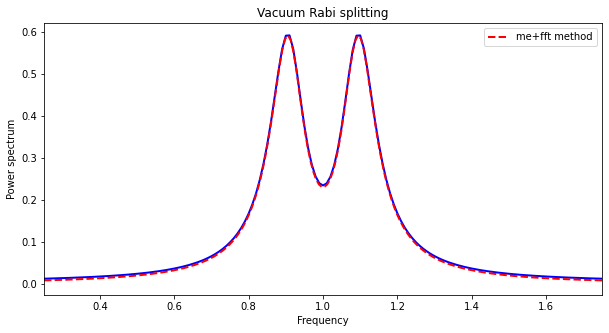

In [138]:
tlist = np.linspace(0, 100, 5000)
corr = qutip.correlation_2op_1t(H, None, tlist, c_ops, a.dag(), a) 
wlist1, spec1 = qutip.spectrum_correlation_fft(tlist, corr)

wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)

# plot the spectra
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2)
ax.plot(wlist2 / (2 * np.pi), spec2, 'r--', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))
plt.show()

## Visualising matrix
\begin{equation}
 \mathcal{H} = a^{\dagger}a \otimes \mathbf{I}_{b}  + \mathbf{I}_a \otimes \sigma_{xb} - \frac{1}{2} \left( a b^{\dagger} + a^{\dagger} b \right)
 \end{equation}


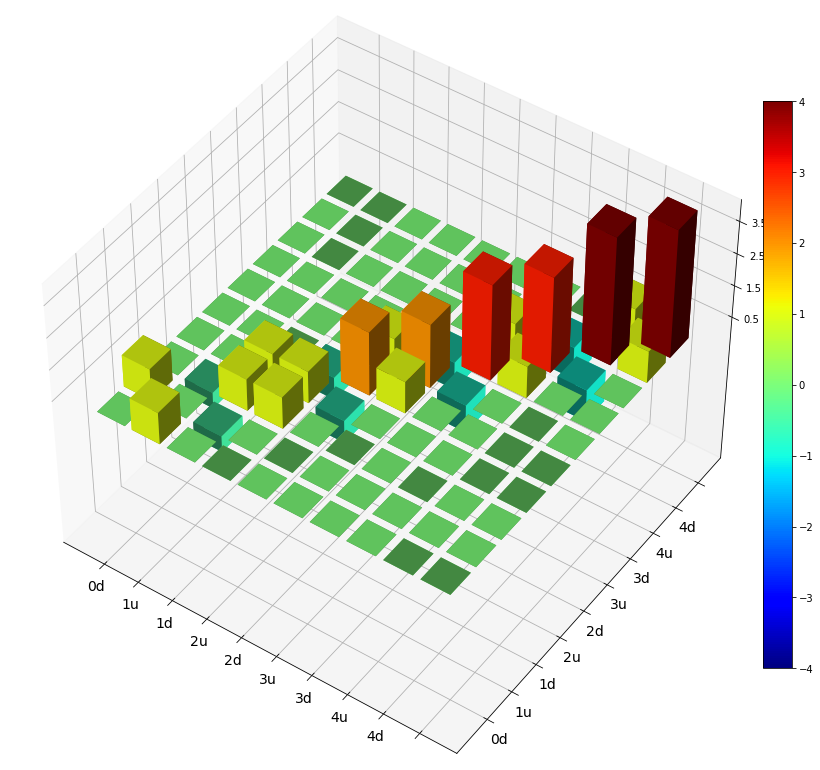

In [101]:
N = 5
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
b = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
sx = qutip.tensor(qutip.qeye(N), qutip.sigmax())
H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)

# set labels
lbls_list = [[str(d) for d in range(N)], ["u", "d"]]
xlabels = []
for inds in qutip.tomography._index_permutations([len(lbls) for lbls in lbls_list]):
    xlabels.append("".join([lbls_list[k][inds[k]]
                            for k in range(len(lbls_list))]))
    
fig, ax = qutip.matrix_histogram(H, xlabels, xlabels, limits=[-4,4])
fig.set_size_inches(18.5, 10.5)
ax.view_init(azim=-55, elev=45)
plt.show()